In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

Text(0.5, 1.0, 'Random Two Class Classification')

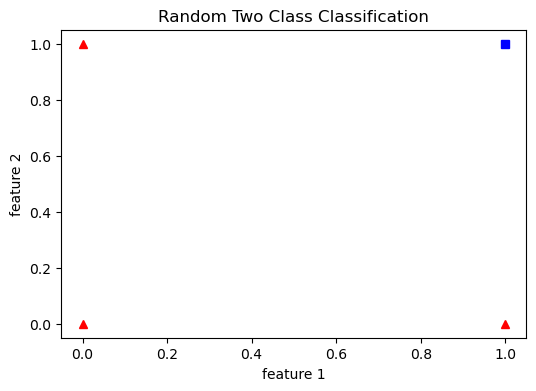

In [2]:
# x,y = datasets.make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])
fig = plt.figure(figsize=(6,4))
plt.plot(x[:,0][y==0],x[:,1][y==0],'r^')
plt.plot(x[:,0][y==1],x[:,1][y==1],'bs')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title("Random Two Class Classification")


In [14]:
def step_fun(z):
    return 1.0 if(z>0) else 0.0

def perceptron(x,y,lr,epochs):
    m,n = x.shape
    theta = np.zeros((n+1,1))
    
    n_miss_list = []
    
    for epoch in range(epochs):
        n_miss = 0
        for idx,x_i in enumerate(x):
            x_i = np.insert(x_i,0,1).reshape(-1,1)
            y_hat = step_fun(np.dot(x_i.T,theta))  
            if (np.squeeze(y_hat) - y[idx])!= 0:
                theta += lr * ((y[idx]-y_hat)*x_i)
                n_miss +=1
        n_miss_list.append(n_miss)
    return theta,n_miss_list


In [15]:
def plot_fun(x,theta):
    x1 = [min(x[:,0]),max(x[:,0])]
    m = -theta[1]/theta[2]+1
    c = -theta[0]/theta[2]-1
    x2 = m*x1 + c
    
    
    fig = plt.figure(figsize=(6,4))
    plt.plot(x[:,0][y==0],x[:,1][y==0],'r^')
    plt.plot(x[:,0][y==1],x[:,1][y==1],'bs')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title("Perceptron Algorithm")
    plt.plot(x1,x2,'y-')
    

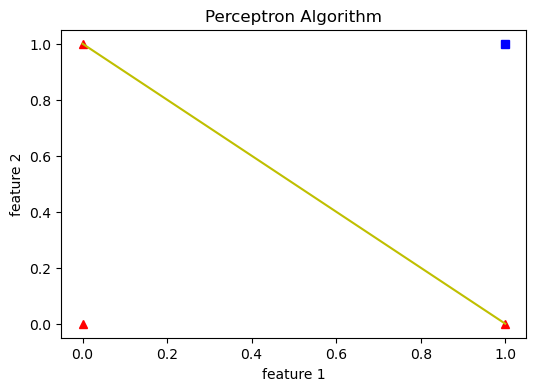

In [16]:
theta,miss_1 = perceptron(x,y,0.5,100)
plot_fun(x,theta)